In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
dataFrame=pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")      # Veri Setini projeye yükledik
dataFrame.head(5)                    # Yükleme Kontrol edildi

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [3]:
dataFrame.dtypes # sütunların veri türleri kontrol edildi

Rank                                int64
Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

In [4]:
dataFrame.isnull().sum() # Eksik veri olup olmadığı kontrol edildi

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

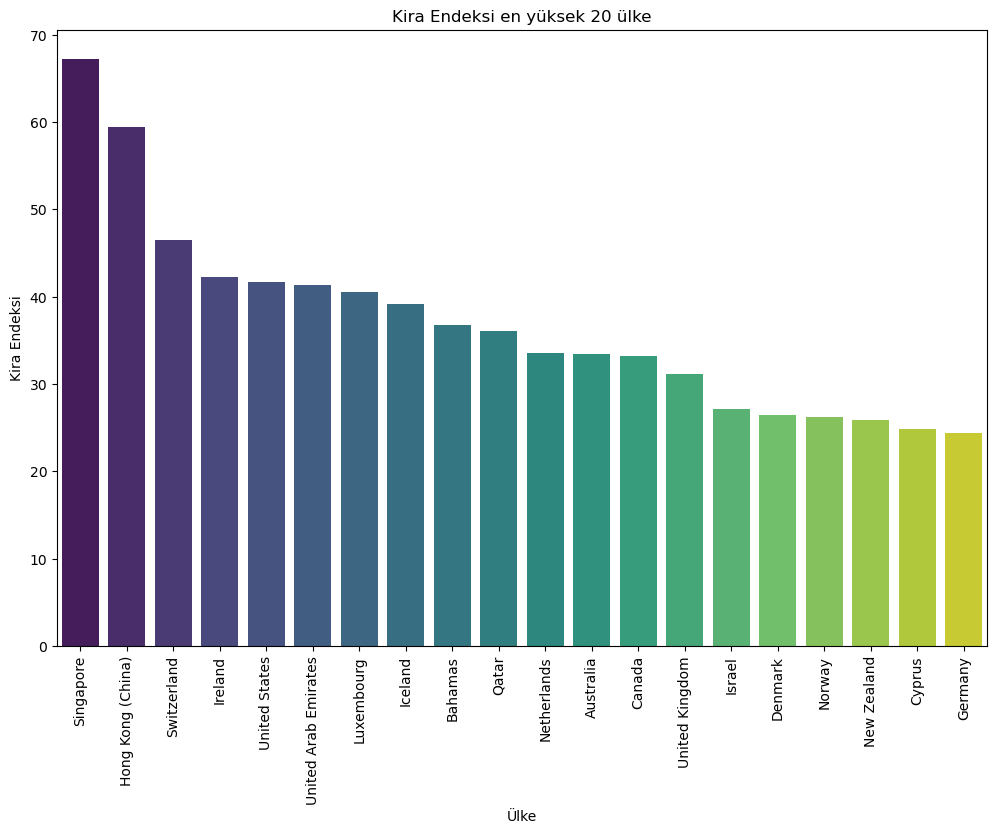

In [5]:
top_rent=dataFrame[["Country","Rent Index"]]
top_rent=top_rent.sort_values(by="Rent Index",ascending=False).head(20)  
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rent, x="Country", y="Rent Index", palette="viridis",hue="Country")
plt.xticks(rotation=90)
plt.title("Kira Endeksi en yüksek 20 ülke")
plt.xlabel("Ülke")         # Kira endeksi en yüksek 20 ülke çubuk grafik(Bar Plot) yardımıyla azalan sıraya göre sıralandı
plt.ylabel("Kira Endeksi")
plt.show()    

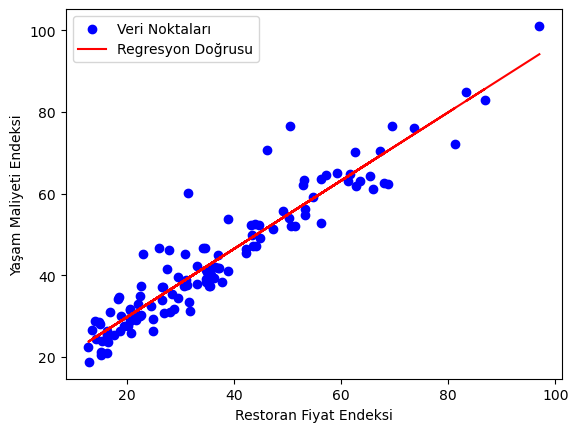

In [6]:
X=dataFrame[["Restaurant Price Index"]] # Bağımsız Değişken
y=dataFrame["Cost of Living Index"] # Bağımlı Değişken
model=LinearRegression()
model.fit(X,y)   # X ve y verilerine göre en iyi doğrusal ilişkiyi bulduk
plt.scatter(X,y,label="Veri Noktaları",color="blue")
plt.plot(X,model.predict(X),color="red",label="Regresyon Doğrusu")
plt.xlabel("Restoran Fiyat Endeksi")
plt.ylabel("Yaşam Maliyeti Endeksi")   
plt.legend()                         
plt.show() 
# Restoran Fiyat Endeksi ile Yaşam Maliyeti Endeksi arasındaki ilişkiyi analiz ettik

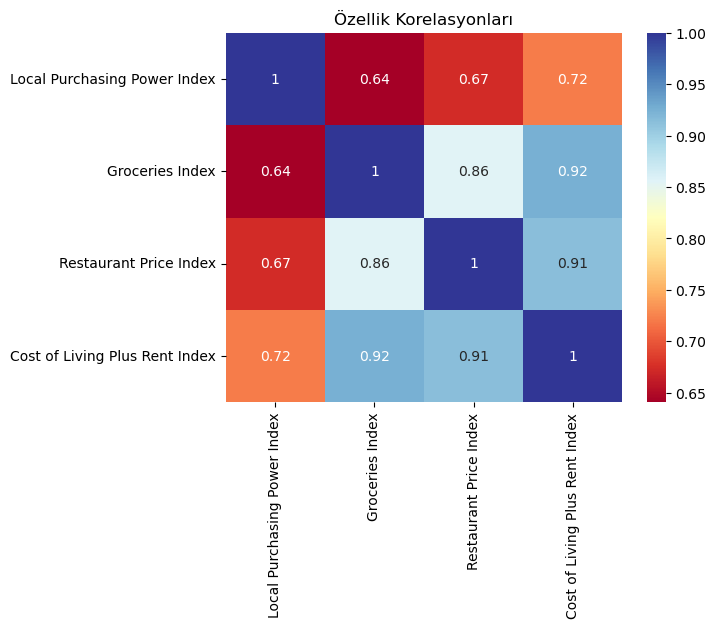

In [7]:
df = dataFrame[["Local Purchasing Power Index", "Groceries Index", "Restaurant Price Index", "Cost of Living Plus Rent Index"]].copy()
df["Local Purchasing Power Index"] = pd.Categorical(df["Local Purchasing Power Index"])
korelasyon=df.corr()
sns.heatmap(korelasyon,annot=True,cmap="RdYlBu")
plt.title("Özellik Korelasyonları")
plt.show()
# Yerel alım gücü ve diğer özellikler arasında korelasyonu hesaplayarak Isı Haritasında gösterdik
# Bu verilerin birbirleri arasında yüksek bir doğru orantıda olduklarını tespit ettik

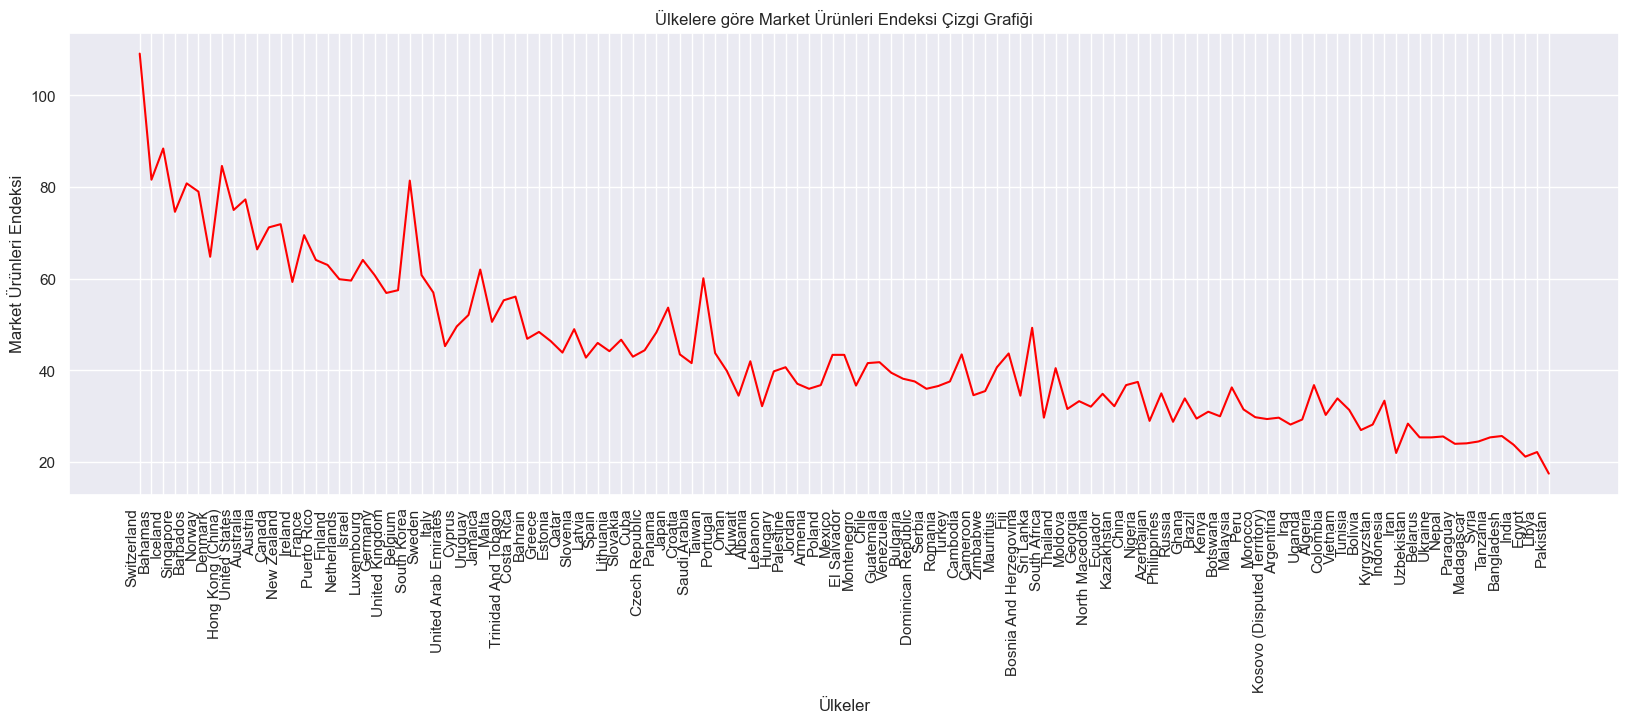

In [8]:
sns.set()
plt.figure(figsize=(20,6))
sns.lineplot(data=dataFrame, x='Country', y='Groceries Index' ,color="red")
plt.xticks(rotation=90,ha="right")
plt.xlabel('Ülkeler')
plt.ylabel('Market Ürünleri Endeksi')
plt.title('Ülkelere göre Market Ürünleri Endeksi Çizgi Grafiği')
plt.show()
# Market ürünleri endeksini ülkelere göre detaylıca inceledik ve en düşük değerin Pakistan olduğunu tespit ettik

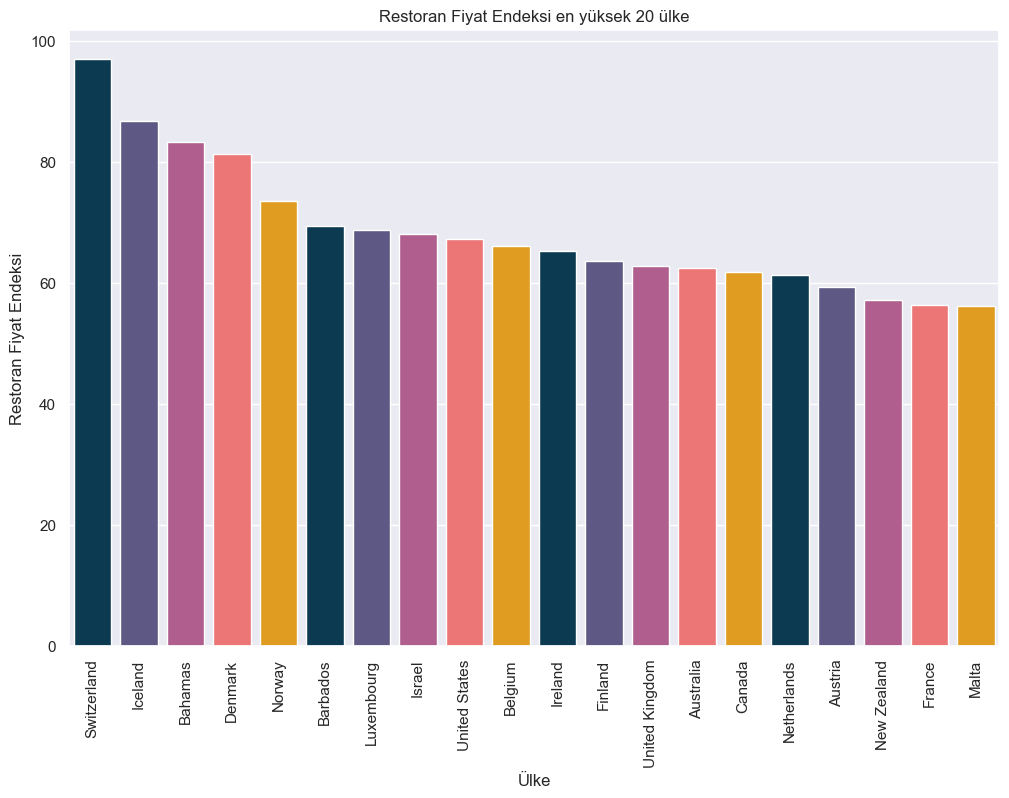

In [9]:
custom_palette = [
    "#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600", "#003f5c", "#58508d", "#bc5090",
    "#ff6361", "#ffa600", "#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600", "#003f5c",    # Grafik renklerini özelleştirdik
    "#58508d", "#bc5090", "#ff6361", "#ffa600"
]
topRestaurant=dataFrame[["Country","Restaurant Price Index"]]
topRestaurant = topRestaurant.sort_values(by="Restaurant Price Index", ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(data=topRestaurant, x="Country", y="Restaurant Price Index", palette=custom_palette,hue="Country")
plt.xticks(rotation=90)
plt.title("Restoran Fiyat Endeksi en yüksek 20 ülke")
plt.xlabel("Ülke")
plt.ylabel("Restoran Fiyat Endeksi")
plt.show()
# Restoran-Fiyat verisi en yüksek 20 ülkeyi tespit ettik